In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [3]:
response=requests.get("https://www.sofascore.com/football/match/bournemouth-crystal-palace/hkb#id:14025237,tab:statistics")

In [5]:
response.status_code

200

In [6]:
soup=BeautifulSoup(response.text,"html.parser")

In [7]:
soup.select('g[cursor="pointer"]')

[]

In [8]:
response.status_code

200

In [9]:
headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.sofascore.com/football/match/bournemouth-crystal-palace/hkb',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
}

url = 'https://www.sofascore.com/api/v1/event/14025237/shotmap'

response = requests.get(url, headers=headers)

print(response.status_code)

200


In [10]:
shots=response.json()

In [11]:
df=pd.json_normalize(shots["shotmap"])

In [12]:
df

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,xgot,id,time,addedTime,...,draw.goal.x,draw.goal.y,blockCoordinates.x,blockCoordinates.y,blockCoordinates.z,draw.block.x,draw.block.y,goalType,player.firstName,player.lastName
0,True,miss,fast-break,right-foot,high,0.569071,0.000000,5961383,90,9.0,...,45.5,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,save,set-piece,left-foot,low-right,0.032009,0.300287,5961371,90,9.0,...,54.4,81.0,3.7,47.1,0.0,47.1,3.7,NaN,NaN,NaN
2,True,goal,penalty,right-foot,low-left,0.788400,0.855617,5961335,90,7.0,...,46.3,98.1,NaN,NaN,NaN,NaN,NaN,penalty,NaN,NaN
3,True,block,corner,left-foot,low-centre,0.030183,0.000000,5961286,90,5.0,...,50.2,81.0,8.4,58.8,0.0,58.8,8.4,NaN,NaN,NaN
4,True,block,throw-in-set-piece,right-foot,low-centre,0.030016,0.000000,5961278,90,4.0,...,50.2,81.0,13.8,41.3,0.0,41.3,13.8,NaN,,
5,True,block,assisted,left-foot,low-centre,0.038807,0.000000,5961265,90,3.0,...,49.9,81.0,7.3,34.7,0.0,34.7,7.3,NaN,,
6,False,goal,assisted,left-foot,low-centre,0.693344,0.991944,5961207,89,NaN,...,49.6,96.8,NaN,NaN,NaN,NaN,NaN,regular,NaN,NaN
7,True,block,regular,left-foot,low-centre,0.110683,0.000000,5960984,77,NaN,...,50.2,81.0,3.2,46.0,0.0,46.0,3.2,NaN,NaN,NaN
8,True,block,assisted,right-foot,low-centre,0.086556,0.000000,5960980,77,NaN,...,50.5,81.0,7.1,51.1,0.0,51.1,7.1,NaN,NaN,NaN
9,True,miss,corner,left-foot,close-right,0.296648,0.000000,5960956,76,NaN,...,57.1,93.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['isHome', 'shotType', 'situation', 'bodyPart', 'goalMouthLocation',
       'xg', 'xgot', 'id', 'time', 'addedTime', 'timeSeconds',
       'reversedPeriodTime', 'reversedPeriodTimeSeconds', 'periodTimeSeconds',
       'incidentType', 'player.name', 'player.slug', 'player.shortName',
       'player.position', 'player.jerseyNumber', 'player.userCount',
       'player.gender', 'player.sofascoreId', 'player.id',
       'player.fieldTranslations.nameTranslation.ar',
       'player.fieldTranslations.nameTranslation.hi',
       'player.fieldTranslations.nameTranslation.bn',
       'player.fieldTranslations.shortNameTranslation.ar',
       'player.fieldTranslations.shortNameTranslation.hi',
       'player.fieldTranslations.shortNameTranslation.bn',
       'playerCoordinates.x', 'playerCoordinates.y', 'playerCoordinates.z',
       'goalMouthCoordinates.x', 'goalMouthCoordinates.y',
       'goalMouthCoordinates.z', 'draw.start.x', 'draw.start.y', 'draw.end.x',
       'draw.end.y', 'draw.go

In [14]:
df=df[["isHome","shotType","xg","time","player.shortName","player.jerseyNumber","playerCoordinates.x","playerCoordinates.y",
        "goalMouthCoordinates.x","goalMouthCoordinates.y","blockCoordinates.x","blockCoordinates.y"]]

In [15]:
df

,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y,blockCoordinates.x,blockCoordinates.y
0,True,miss,0.569071,90,J. Mateta,14,9.8,51.3,0,54.5,NaN,NaN
1,False,save,0.032009,90,M. Senesi,5,17.9,36.0,0,45.6,3.7,47.1
2,True,goal,0.788400,90,J. Mateta,14,11.5,50.0,0,53.7,NaN,NaN
3,True,block,0.030183,90,M. Lacroix,5,9.6,60.1,0,49.8,8.4,58.8
4,True,block,0.030016,90,C. Richards,26,15.3,40.4,0,49.8,13.8,41.3
5,True,block,0.038807,90,E. Nketiah,9,9.3,30.6,0,50.1,7.3,34.7
6,False,goal,0.693344,89,R. Christie,10,3.1,49.0,0,50.4,NaN,NaN
7,True,block,0.110683,77,J. Mateta,14,8.6,38.9,0,49.8,3.2,46.0
8,True,block,0.086556,77,J. Mateta,14,13.8,51.6,0,49.5,7.1,51.1
9,True,miss,0.296648,76,I. Sarr,7,5.4,57.0,0,42.9,NaN,NaN


In [16]:
df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
df["goalMouthCoordinates.x"]=df["goalMouthCoordinates.x"]*1.2
df["goalMouthCoordinates.y"]=df["goalMouthCoordinates.y"]*0.8

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_15384\1037772248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_15384\1037772248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_15384\1037772248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [17]:
df

,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y,blockCoordinates.x,blockCoordinates.y
0,True,miss,0.569071,90,J. Mateta,14,11.76,41.04,0.0,43.60,NaN,NaN
1,False,save,0.032009,90,M. Senesi,5,21.48,28.80,0.0,36.48,3.7,47.1
2,True,goal,0.788400,90,J. Mateta,14,13.80,40.00,0.0,42.96,NaN,NaN
3,True,block,0.030183,90,M. Lacroix,5,11.52,48.08,0.0,39.84,8.4,58.8
4,True,block,0.030016,90,C. Richards,26,18.36,32.32,0.0,39.84,13.8,41.3
5,True,block,0.038807,90,E. Nketiah,9,11.16,24.48,0.0,40.08,7.3,34.7
6,False,goal,0.693344,89,R. Christie,10,3.72,39.20,0.0,40.32,NaN,NaN
7,True,block,0.110683,77,J. Mateta,14,10.32,31.12,0.0,39.84,3.2,46.0
8,True,block,0.086556,77,J. Mateta,14,16.56,41.28,0.0,39.60,7.1,51.1
9,True,miss,0.296648,76,I. Sarr,7,6.48,45.60,0.0,34.32,NaN,NaN


In [18]:
for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==False):
        df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]
    if (df["isHome"][x]==True):
        df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_15384\1948113594.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_15384

In [19]:
df

,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y,blockCoordinates.x,blockCoordinates.y
0,True,miss,0.569071,90,J. Mateta,14,11.76,38.96,0.0,43.60,NaN,NaN
1,False,save,0.032009,90,M. Senesi,5,21.48,51.20,0.0,36.48,3.7,47.1
2,True,goal,0.788400,90,J. Mateta,14,13.80,40.00,0.0,42.96,NaN,NaN
3,True,block,0.030183,90,M. Lacroix,5,11.52,31.92,0.0,39.84,8.4,58.8
4,True,block,0.030016,90,C. Richards,26,18.36,47.68,0.0,39.84,13.8,41.3
5,True,block,0.038807,90,E. Nketiah,9,11.16,55.52,0.0,40.08,7.3,34.7
6,False,goal,0.693344,89,R. Christie,10,3.72,40.80,0.0,40.32,NaN,NaN
7,True,block,0.110683,77,J. Mateta,14,10.32,48.88,0.0,39.84,3.2,46.0
8,True,block,0.086556,77,J. Mateta,14,16.56,38.72,0.0,39.60,7.1,51.1
9,True,miss,0.296648,76,I. Sarr,7,6.48,34.40,0.0,34.32,NaN,NaN


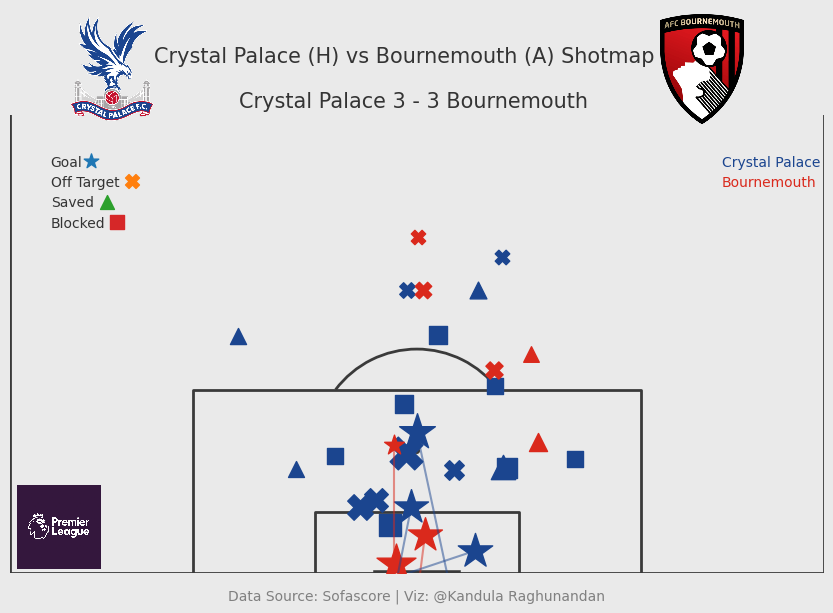

In [30]:
fig, ax=plt.subplots(figsize=(10.5,7))
fig.set_facecolor("#EAEAEA")
ax.patch.set_facecolor("#EAEAEA")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#EAEAEA', line_color='#3A3A3A',half=True)
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Crystal Palace.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Bournemouth.png")
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Prem Logo.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

ax.set_xlim(0,80)
ax.set_ylim(0,45)

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#1B458F",s=df["xg"][x]*800+100,marker="^")
        if ((df["shotType"][x]=="miss") | (df["shotType"][x]=="post")):
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#1B458F",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#1B458F",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#1B458F",s=df["xg"][x]*800+100,marker="*")
            plt.plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#1B458F",alpha=0.5)
    if (df["isHome"][x]==False):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#DA291C",s=df["xg"][x]*800+100,marker="^")
        if ((df["shotType"][x]=="miss") | (df["shotType"][x]=="post")):
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#DA291C",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#DA291C",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#DA291C",s=df["xg"][x]*800+100,marker="*")
            plt.plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#DA291C",alpha=0.5)

plt.title("Crystal Palace 3 - 3 Bournemouth ",color="#343434",size=15)
plt.suptitle("Crystal Palace (H) vs Bournemouth (A) Shotmap", fontsize=15, color="#343434", y=0.92)
ax.text(4,40,"Goal",c="#343434")
ax.scatter(8,40.5,marker="*",s=120)
ax.text(4,38,"Off Target",color="#343434")
ax.scatter(12,38.5,marker="X",s=100)
ax.text(4,36,"Saved",color="#343434")
ax.scatter(9.5,36.5,marker="^",s=100)
ax.text(4,34,"Blocked",color="#343434")
ax.scatter(10.5,34.5,marker="s",s=100)

ax.text(70,40,"Crystal Palace",c="#1B458F")
ax.text(70,38,"Bournemouth",c="#DA291C")

add_logo(ax, home_logo, zoom=0.2, xy=(0.125, 1.1))
add_logo(ax, away_logo, zoom=0.2, xy=(0.85, 1.1))
add_logo(ax,league_logo,zoom=0.03, xy=(0.06,0.1))

plt.text(
    0.5, -0.05, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

plt.savefig("C:/Users/K Raghunandan/Analyst/Results/Crystal_palace_vs_Bournemouth_2025.png")

In [31]:
df=df.sort_values("time").reset_index()
df

,index,isHome,shotType,xg,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y,blockCoordinates.x,blockCoordinates.y
0,27,True,save,0.042537,4,J. Mateta,14,23.28,22.40,0.0,40.72,1.2,53.1
1,26,False,goal,0.958524,7,E. J. Kroupi,22,0.84,37.92,0.0,37.68,NaN,NaN
2,25,False,miss,0.049556,11,A. Scott,8,27.84,40.56,0.0,44.64,NaN,NaN
3,24,True,save,0.057669,22,T. Mitchell,3,27.84,46.00,0.0,42.56,2.7,49.6
4,23,False,save,0.086467,26,A. Semenyo,24,12.84,51.92,0.0,37.76,2.5,46.0
5,22,True,miss,0.237143,27,J. Mateta,14,7.20,36.00,0.0,46.40,NaN,NaN
6,21,True,block,0.206896,29,M. Guéhi,6,4.68,37.36,0.0,39.12,2.5,52.5
7,20,False,goal,0.152204,38,E. J. Kroupi,22,12.60,37.76,0.0,37.76,NaN,NaN
8,19,True,save,0.258298,45,J. Mateta,14,10.44,48.48,0.0,42.64,2.3,46.4
9,18,True,block,0.092257,48,A. Wharton,20,23.40,42.08,0.0,41.36,10.2,48.2


In [32]:
a_xG=[0]
h_xG=[0]
a_min=[0]
h_min=[0]

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        h_xG.append(df["xg"][x])
        h_min.append(df["time"][x])
    if (df["isHome"][x]==False):
        a_xG.append(df["xg"][x])
        a_min.append(df["time"][x])

In [33]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cum=nums_cumulative_sum(a_xG)
h_cum=nums_cumulative_sum(h_xG)

In [34]:
h_cum

[0,
 np.float64(0.042537193745375),
 np.float64(0.100206401199103),
 np.float64(0.337349575012923),
 np.float64(0.544245790690183),
 np.float64(0.802543859928843),
 np.float64(0.894801039248702),
 np.float64(0.925255158916113),
 np.float64(1.048307949677103),
 np.float64(1.059570470824831),
 np.float64(1.7618654165416912),
 np.float64(2.4836188945919213),
 np.float64(2.5227039549499684),
 np.float64(2.8193522784858884),
 np.float64(2.9300348032265884),
 np.float64(3.016591290012),
 np.float64(3.055397940799592),
 np.float64(3.085413461551068),
 np.float64(3.115596780553458),
 np.float64(3.9039967805534577),
 np.float64(4.4730675369888475)]

In [35]:
a_cum

[0,
 np.float64(0.95852375030518),
 np.float64(1.008079547435049),
 np.float64(1.094546798616651),
 np.float64(1.246750701218851),
 np.float64(1.2545276531018392),
 np.float64(1.3203532346524371),
 np.float64(2.0136974104680174),
 np.float64(2.0457066395320056)]

In [36]:
a_total=round(a_cum[-1],2)
h_total=round(h_cum[-1],2)

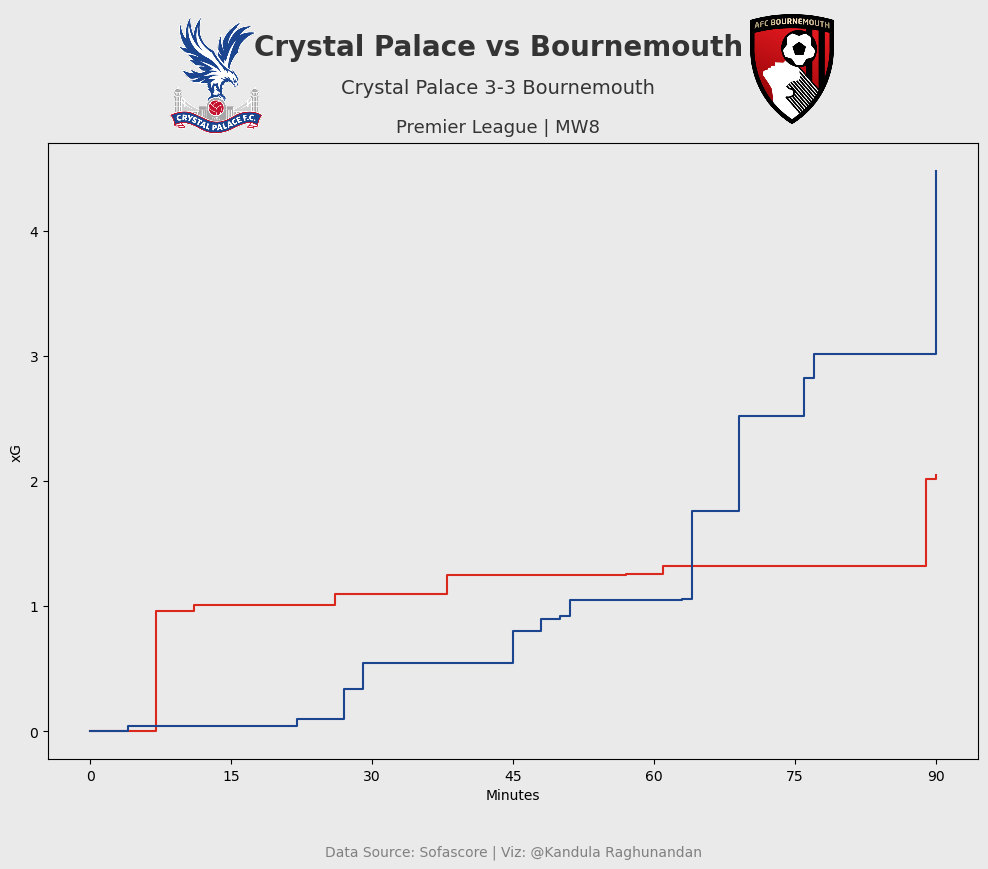

In [41]:
fig,ax=plt.subplots(figsize=(12,8))
fig.set_facecolor("#EAEAEA")
ax.patch.set_facecolor("#EAEAEA")

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel("Minutes")
plt.ylabel("xG")

ax.step(x=a_min,y=a_cum,where="post",color="#DA291C")
ax.step(x=h_min,y=h_cum,where="post",color="#1B458F")

fig.text(0.5, 1, "Crystal Palace vs Bournemouth", fontsize=20, fontweight='bold', color='#343434', ha="center", va="center")
fig.text(0.5, 0.95, "Crystal Palace 3-3 Bournemouth", fontsize=14, color='#343434', ha="center", va="center")
fig.text(0.5, 0.90, "Premier League | MW8", fontsize=13, color='#343434', ha="center", va="center" )

home_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Crystal Palace.png")
away_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Bournemouth.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

add_logo(ax, home_logo, zoom=0.225, xy=(0.18, 1.11))
add_logo(ax, away_logo, zoom=0.2, xy=(0.8, 1.12))

plt.text(
    0.5, -0.15, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

fig.savefig("C:/Users/K Raghunandan/Analyst/Results/Crystal_palace_vs_Bournemouth_2025_xG.png", bbox_inches='tight')